In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import imghdr

In [2]:
loaded_model = load_model('Model//best_model.h5')

In [6]:
data_dir = 'C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images' 

In [7]:
image_exts = ['png']

In [11]:
for image_class in tqdm(os.listdir(data_dir)): 
    for image in tqdm(os.listdir(os.path.join(data_dir, image_class))):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

 50%|█████     | 1/2 [00:00<00:00,  5.69it/s]

Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_162.png
Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_163.png
Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png
Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_165.png
Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_166.png
Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_167.png
Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images

Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_128.png
Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_131.png
Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_144.png
Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_21.png
Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_25.png
Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_34.png
Issue with image C:/Projects/Malaria Cell Prediction using CNN/Dataset/cell_images/cell_ima

100%|██████████| 2/2 [00:00<00:00,  4.12it/s]


In [13]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 27558 files belonging to 2 classes.


In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [18]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = loaded_model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 120ms/step


In [19]:
print("Precision : ",pre.result())
print("Recall : ",re.result())
print("Binary Accuracy : ",acc.result())

Precision :  tf.Tensor(0.9314879, shape=(), dtype=float32)
Recall :  tf.Tensor(0.98033506, shape=(), dtype=float32)
Binary Accuracy :  tf.Tensor(0.9542151, shape=(), dtype=float32)


In [21]:
y_true, y_prob = [], []

In [23]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_true.extend(y)
    y_prob.extend(loaded_model.predict(X).ravel())

1/1 [==============================] - 0s 106ms/step


In [26]:
y_true = np.array(y_true)
y_probs = np.array(y_prob)

In [27]:
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

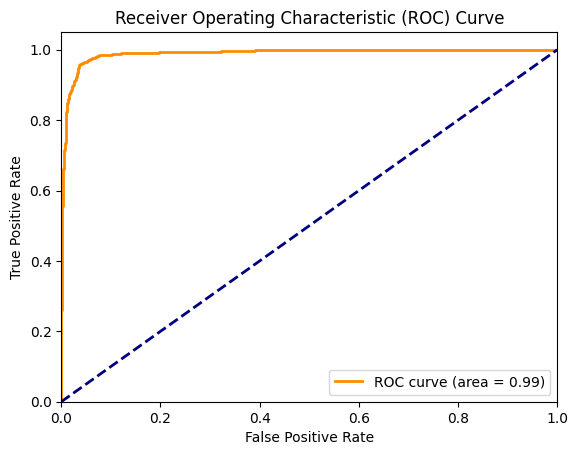

In [31]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()